In \[1\]:

    # This Python 3 environment comes with many helpful analytics libraries installed
    # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
    # For example, here's several helpful packages to load in 

    import numpy as np # linear algebra
    import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
    import matplotlib.pyplot as plt
    import seaborn as sns
    import math

    # Input data files are available in the "../input/" directory.
    # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

    import os
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

    # Any results you write to the current directory are saved as output.

In \[2\]:

    df = pd.read_csv('../input/forest-fires-in-brazil/amazon.csv', encoding='latin1')
    df.tail()

Out\[2\]:

|      | year | state     | month    | number | date       |
|------|------|-----------|----------|--------|------------|
| 6449 | 2012 | Tocantins | Dezembro | 128.0  | 2012-01-01 |
| 6450 | 2013 | Tocantins | Dezembro | 85.0   | 2013-01-01 |
| 6451 | 2014 | Tocantins | Dezembro | 223.0  | 2014-01-01 |
| 6452 | 2015 | Tocantins | Dezembro | 373.0  | 2015-01-01 |
| 6453 | 2016 | Tocantins | Dezembro | 119.0  | 2016-01-01 |

Here we can see the data available to analysis. Let's drop the 'date'
column, as we can have that information about year and month in their
own columns.

In \[3\]:

    df.drop('date', axis=1, inplace=True)
    df.tail()

Out\[3\]:

|      | year | state     | month    | number |
|------|------|-----------|----------|--------|
| 6449 | 2012 | Tocantins | Dezembro | 128.0  |
| 6450 | 2013 | Tocantins | Dezembro | 85.0   |
| 6451 | 2014 | Tocantins | Dezembro | 223.0  |
| 6452 | 2015 | Tocantins | Dezembro | 373.0  |
| 6453 | 2016 | Tocantins | Dezembro | 119.0  |

We should change the month names to english.

In \[4\]:

    df.month.replace('Janeiro', 'January',inplace=True)
    df.month.replace('Fevereiro','February',inplace=True)
    df.month.replace('Março','March',inplace=True)
    df.month.replace('Abril','April',inplace=True)
    df.month.replace('Maio','May',inplace=True)
    df.month.replace('Junho','June',inplace=True)
    df.month.replace('Julho','July',inplace=True)
    df.month.replace('Agosto','August',inplace=True)
    df.month.replace('Setembro','September',inplace=True)
    df.month.replace('Outubro','October',inplace=True)
    df.month.replace('Novembro','November',inplace=True)
    df.month.replace('Dezembro','December',inplace=True)
    df.tail()

Out\[4\]:

|      | year | state     | month    | number |
|------|------|-----------|----------|--------|
| 6449 | 2012 | Tocantins | December | 128.0  |
| 6450 | 2013 | Tocantins | December | 85.0   |
| 6451 | 2014 | Tocantins | December | 223.0  |
| 6452 | 2015 | Tocantins | December | 373.0  |
| 6453 | 2016 | Tocantins | December | 119.0  |

Below, we can see the statiscal information about the reported number of
fires

In \[5\]:

    df['number'].describe()

Out\[5\]:

    count    6454.000000
    mean      108.293163
    std       190.812242
    min         0.000000
    25%         3.000000
    50%        24.000000
    75%       113.000000
    max       998.000000
    Name: number, dtype: float64

Although the mean number of reported fires is relatively low, the
standard deviation is quite high. Suggesting that it changes over time.

As we can see, the max number of fires is 998. Let's discover where and
when it happened.

In \[6\]:

    print('Max number of registered fires in a month: ',df['number'].max())
    print('State: ',df[df['number'] ==  df['number'].max()]['state'].iloc[0])
    print('Year: ',df[df['number'] ==  df['number'].max()]['month'].iloc[0])
    print('Month: ',df[df['number'] ==  df['number'].max()]['year'].iloc[0])

    Max number of registered fires in a month:  998.0
    State:  Amazonas
    Year:  September
    Month:  2008

It happened in the state of Amazonas. As we know, the state of Amazonas
contains a large area of the amazon rainforest, therefore, is not
surprise that the max number of fires has been reported in that state.

We now analyse which months are worst using some basic statistics. We
will define these months as the ones that have a reported number of
fires higher than mean + standard deviation of the total number of
fires.

In \[7\]:

    queim_sum_mês = df.groupby(['month'], as_index=False).sum() 
    queim_sum_mês.drop('year',axis=1, inplace=True)

    piores_meses = queim_sum_mês[queim_sum_mês['number']>queim_sum_mês['number'].mean()+queim_sum_mês['number'].std()]
    print('Worst months: ')
    for i in range(len(piores_meses)):
        print(piores_meses['month'].values[i])

    sns.catplot(x='month', y='number', kind='bar',data=df[['month','number']], aspect=5, estimator=sum);

    Worst months: 
    August
    July
    November
    October

<img src="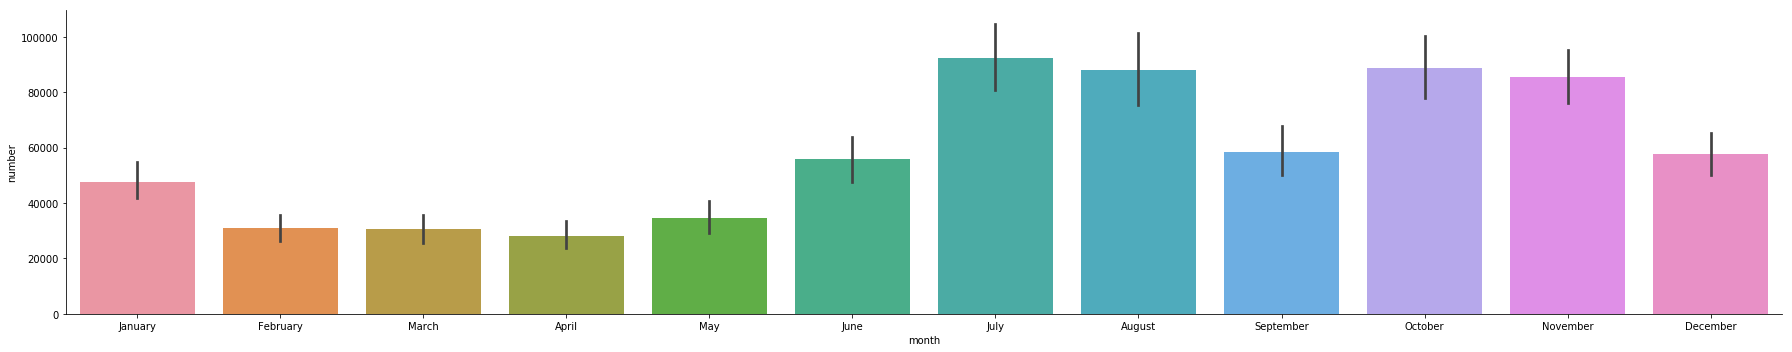%0A" class="jp-needs-light-background" />

Our statistical approach seems to work fine, since it is in accordance
to the higher values of reported fire, therefore, filtering the lesser
critical months.

Using the same approach, we define the states that are more affected by
fire.

In \[8\]:

    queim_sum_estados = df.groupby(['state'], as_index=False).sum()
    queim_sum_estados.drop('year',axis=1, inplace=True)


    sns.catplot(x='state', y='number',data=df[['state','number']], kind='bar', aspect=5, estimator=sum);

    piores_estados = queim_sum_estados[queim_sum_estados['number']> queim_sum_estados['number'].mean() +queim_sum_estados['number'].std()]
    print('Worst states: ')
    for i in range(len(piores_estados)):
        print(piores_estados['state'].values[i])

    Worst states: 
    Mato Grosso
    Paraiba
    Sao Paulo

<img src="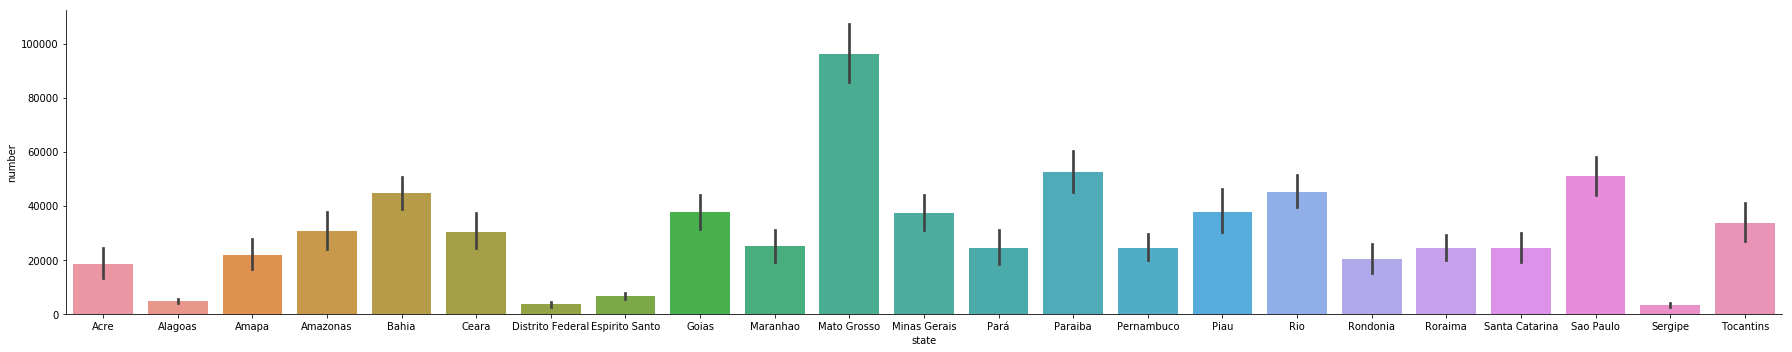%0A" class="jp-needs-light-background" />

Curiously, the state of Amazonia is not included in the list. Maybe the
first information about Amazonia that we found is a "outlier" of the
occurances in the state, and is not a good representation of what
actually happens there.

At last, we see how the reported number of fires has changed over the
years. We use the same statistical approach to define the worst ones.

In \[9\]:

    queim_sum_ano = df.groupby(['year'], as_index=False).sum() 

    piores_anos = queim_sum_ano[queim_sum_ano['number']>queim_sum_ano['number'].mean() + queim_sum_ano['number'].std()]
    print('Worst years: ')
    for i in range(len(piores_anos)):
        print(piores_anos['year'].values[i])


    plt.figure(figsize=[12,7])
    plt.xlim([1998, 2017])
    plt.title('Registered number of fires per year (sum of all entries)')
    sns.lineplot(x='year', y='number',data=queim_sum_ano);

    Worst years: 
    2003
    2015
    2016

<img src="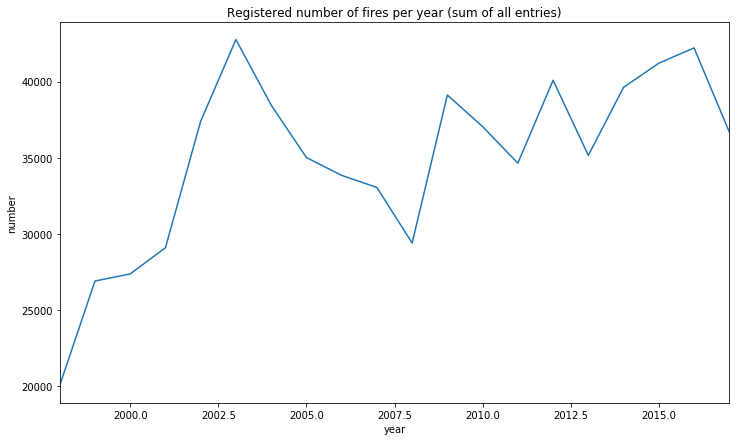%0A" class="jp-needs-light-background" />

We can see a that the reported number of fires increased in a very fast
rhythm until 2003, then it started to fall. But since 2008, this number
started to increase again.

Let's see if can predict the number of fires in the incoming years using
the data available.

Analysing the data, seems reasonable to fit it into a third degree
polynomial function.

In \[10\]:

    poly = np.polyfit(queim_sum_ano['year'],queim_sum_ano['number'],3)
    z = np.poly1d(poly)
        
    anos = np.linspace(1998, 2017, 20)

    plt.figure(figsize=[12,7])
    plt.plot(anos, queim_sum_ano['number'], '-', label='Real data') 
    plt.plot(anos,z(anos), '--', label='Fitted curve')
    plt.xlim([1998, 2017])
    plt.ylim([17000, 48000])
    plt.title('Fitting the real data into a curve (all registered years)')
    plt.legend()
    plt.show()

<img src="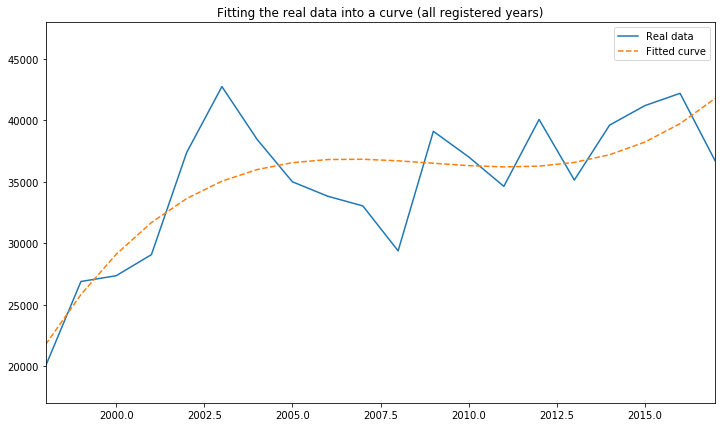%0A" class="jp-needs-light-background" />

Predicting the number of fires:

In \[11\]:

    for i in range(2019,2024,1):
        print(i, '->', math.trunc(z(i)))

    2019 -> 47933
    2020 -> 52148
    2021 -> 57237
    2022 -> 63279
    2023 -> 70352

It is not very optimistic, is it? The third degree polynomial seems to
be a bit aggresive, maybe, due to the earlier years of the data set and
it fast increase. Let's use only the data after 2006, and fit it into a
first degree polynomial function.

In \[12\]:

    new_model = queim_sum_ano[queim_sum_ano['year']>2006]
    poly = np.polyfit(new_model['year'],new_model['number'],1)
    z = np.poly1d(poly)
        
    anos = np.linspace(2007, 2017, 11)

    plt.figure(figsize=[12,7])
    plt.plot(anos, new_model['number'], '-', label='Real data') 
    plt.plot(anos,z(anos), '--', label='Fitted curve')
    plt.xlim([2007, 2017])
    plt.ylim([17000, 48000])
    plt.title('Fitting the real data into a curve (years>2006)')
    plt.legend()
    plt.show()

<img src="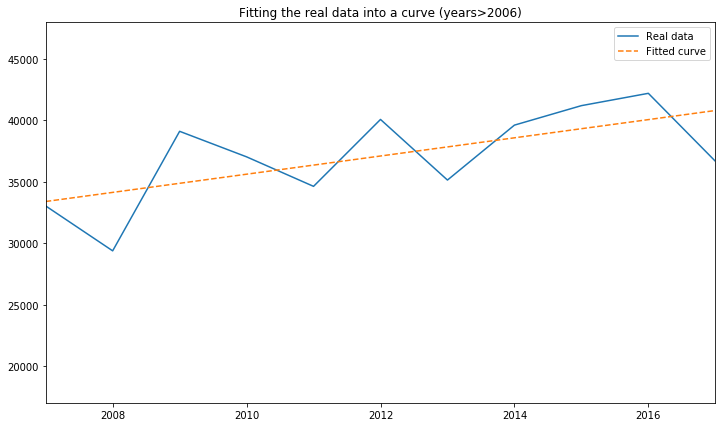%0A" class="jp-needs-light-background" />

The new prediction:

In \[13\]:

    for i in range(2019,2024,1):
        print(i, '->', math.trunc(z(i)))

    2019 -> 42293
    2020 -> 43034
    2021 -> 43776
    2022 -> 44517
    2023 -> 45258

We can say that we achieved not so aggressive results. But, as we know,
since the beginning of 2019 the number of fires in the amazon rainforest
has increased again. Therefore, our model to predict the number of fires
in the incoming years seems to be correct, unfortunately.

In \[ \]:

     

In \[ \]:

     

In \[ \]: